# Convolutional Neural Networks or CNNs

"A CNN is a type of neural network (almost always a deep learning neural network) that is effective at computer vision. Primary uses cases include image recognition and classification.  

A deep learning network can be used to classify images.  However, the network created by a deep learning model recognizes global patterns in the pixels.  For example, the matrix created in the MNIST Image Reader application used each pixel as a feature but did not consider the relationship between those pixels.  

In a CNN, spatial features are also considered by using filters.  This allows features to be constructed from patterns in the image no matter where they occur in the image.  In the example seen earlier, the MNIST model might not have been effective if the image contained a number that was severely off-center or much smaller in relationship to the canvas than the images it was trained on. In other words, if the image is more abstract or did not fit a specific criteria/pattern as a whole, the Deep Neural Network would have failed at accurate predictions. This is where CNNs shine the most.  

A CNN preserves the relationship between pixels by learning image features using small squares or filters of input data.  Each filter is responsible for identifying a different spatial feature like edge, color, or texture.  Imagine trying to detect a tiger in an image. One filter might highlight everything that is orange and another everything with stripes." - Charles Huyi, UC Berkeley Professor  

[Convolutional Neural Network](https://ujjwalkarn.me/2016/08/11/intuitive-explanation-convnets/)  

[Image-Net Database](http://www.image-net.org/index)

### Using Pre-trained models from Keras: VGG19

[VGG19 Documentation](https://keras.io/api/applications/vgg/)

In [1]:
# Step 1: Import Dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.applications.vgg19 import (VGG19, preprocess_input, decode_predictions)

In [2]:
# Step 2: Specify that I want all weights that were pretrained on ImageNet
model = VGG19(weights='imagenet')

574717952/574710816 [==============================] - 214s 0us/step


In [3]:
# Step 3: per vgg19 documentation, specify the image size as 224
image_size = (224, 224)

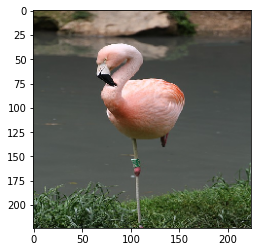

In [5]:
# Step 4: Load the image then resize it
img = image.load_img(os.path.join("images", "bird1.jpg"), target_size=image_size)
plt.imshow(img)

### Data Preprocessing

In [6]:
# Step 5: Convert the image into an array
x = image.img_to_array(img)

In [7]:
# Step 6: Scale and Normalize the image per vgg19 documentation
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# every model comes with a pre-made preprocessing instructions. just calling preprocess_input will format the model for you.

In [8]:
# Step 7: Make predictions. decode_predictions is included via vgg19 documentation
predictions = model.predict(x)
print('Predicted: ', decode_predictions(predictions, top=3))

40960/35363 [==================================] - 0s 1us/step
Predicted:  [[('n02007558', 'flamingo', 0.96581215), ('n01855672', 'goose', 0.010761659), ('n02006656', 'spoonbill', 0.009033224)]]


### What is this saying?  

There is a 96% chance it is a Flamingo, 1% chance it is a goose, and a .9% chance it is a spoonbill

In [9]:
# Step 8: throw all the above into a function to have it be reusable

def predict(image_path):
    """ Using VGG19 """
    img = image.load_image(image_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    predictions = model.predict(x)
    plt.imshow(img)
    print('Predicted: ', decode_predictions(predictions, top=3))